# Spatial distribution of oscillations recorded with BSSU

Import Packages

In [23]:

import os
import sys
import importlib
from importlib import reload 
from dataclasses import dataclass, field, fields
from itertools import compress
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

import scipy
import scipy.io as sio
from scipy import signal
from scipy.signal import spectrogram, hann, butter, filtfilt, freqz
from scipy import stats
from scipy.stats import norm

import seaborn as sns
import pingouin as pg
import itertools
from itertools import combinations
from statannotations.Annotator import Annotator
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
import plotly.express as px

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report

# import openpyxl
# from openpyxl import Workbook, load_workbook
# import xlrd
import pickle
import json
import csv

#mne
import mne_bids
import mne
from mne.time_frequency import tfr_morlet 
from mne.stats import permutation_cluster_test


# TODO: add README file: 
# pip install pingouin
# pip install statannotations
# pip install fooof

In [2]:
import py_perceive

In [3]:
from py_perceive.PerceiveImport.classes import (
    main_class, modality_class, metadata_class,
    session_class, condition_class, task_class,
    contact_class, run_class
)
import py_perceive.PerceiveImport.methods.load_rawfile as load_rawfile
import py_perceive.PerceiveImport.methods.find_folders as find_folders
import py_perceive.PerceiveImport.methods.metadata_helpers as metaHelpers


importlib.reload(main_class)
importlib.reload(session_class)
importlib.reload(task_class)
importlib.reload(condition_class)
importlib.reload(contact_class)
importlib.reload(metadata_class)
importlib.reload(modality_class)
importlib.reload(load_rawfile)
importlib.reload(find_folders)
importlib.reload(run_class)
importlib.reload(metaHelpers)

<module 'py_perceive.PerceiveImport.methods.metadata_helpers' from 'C:\\Users\\jebe12\\Research\\PyPerceive_Project\\Code\\PyPerceive\\src\\py_perceive\\PerceiveImport\\methods\\metadata_helpers.py'>

In [4]:
#######################     USE THIS DIRECTORY FOR WORKING WITH FOLDERS INSIDE OF CODE FOLDER OF BETASENSIGHTLONGTERM REPO  #######################


# create a path to the BetaSenSightLongterm folder 
# and a path to the code folder within the BetaSenSightLongterm Repo
current_path = os.getcwd()
while current_path[-8:] != 'Research':
    current_path = os.path.dirname(current_path)

# directory to code folder
code_path = os.path.join(current_path, 'Longterm_beta_project','Code', 'meet')
sys.path.append(code_path)

# # change directory to code path within BetaSenSightLongterm Repo
os.chdir(code_path)
os.getcwd()


'c:\\Users\\jebe12\\Research\\Longterm_beta_project\\Code\\meet'

In [5]:
import meet as meet

In [6]:
#######################     USE THIS DIRECTORY FOR WORKING WITH FOLDERS INSIDE OF CODE FOLDER OF BETASENSIGHTLONGTERM REPO  #######################


# create a path to the BetaSenSightLongterm folder 
# and a path to the code folder within the BetaSenSightLongterm Repo
current_path = os.getcwd()
while current_path[-8:] != 'Research':
    current_path = os.path.dirname(current_path)

# directory to code folder
code_path = os.path.join(current_path, 'Longterm_beta_project','Code', 'BetaSenSightLongterm')
sys.path.append(code_path)

# # change directory to code path within BetaSenSightLongterm Repo
os.chdir(code_path)
os.getcwd()

'c:\\Users\\jebe12\\Research\\Longterm_beta_project\\Code\\BetaSenSightLongterm'

In [28]:
# tfr, processing
import src.bssu.tfr.BSSuPsd as BSSuPsd
import src.bssu.tfr.FastFourierPSD as FFpsd

# bipolar Channel Analysis
import src.bssu.bipolar.power_spectra_plots as power_spectra_plots
import src.bssu.bipolar.PeakFrequencies_PSD as PeakFrequency_psd
import src.bssu.bipolar.BIP_channelGroups as BIP_channelGroups
import src.bssu.bipolar.BIP_perChannelAnalysis as BIP_perChannel
import src.bssu.bipolar.cluster_perm as cluster_perm


# monopolar Referencing
import src.bssu.monopolar.MonoRef_JLB as MonoRefJLB
import src.bssu.monopolar.GroupMonopolarPSD as groupMonopol

# Ranking Order
import src.bssu.ranking.HighestRankedChannelPSD as highestRank
import src.bssu.ranking.monopolPSDaverage_withinSubject as PSDaverageMonopol
import src.bssu.ranking.BIPchannelGroups_ranks as BIP_ranks
import src.bssu.ranking.Permutation_rankings as Permute_ranks


# Clinical stimulation parameters
import src.bssu.stimulation.activeStimulationContacts as activeStimContacts

# utility functions
import src.bssu.utils.loadResults as loadResults
import src.bssu.utils.find_folders as find_folders
import src.bssu.utils.writeGroupDataframes as writeGroupDF

# import Classes
from src.bssu.classes import (metadataAnalysis_class, mainAnalysis_class, sessionAnalysis_class, 
                              channelAnalysis_class, featureAnalysis_class, frequencyBand_class)

# import mni coordinates
import src.bssu.mni.load_rotated_coordinates as load_mni


importlib.reload(BSSuPsd)
importlib.reload(MonoRefJLB)
importlib.reload(loadResults)
importlib.reload(highestRank)
importlib.reload(groupMonopol)
importlib.reload(PSDaverageMonopol)
importlib.reload(FFpsd)
importlib.reload(find_folders)
importlib.reload(metadataAnalysis_class)
importlib.reload(mainAnalysis_class)
importlib.reload(sessionAnalysis_class)
importlib.reload(channelAnalysis_class)
importlib.reload(featureAnalysis_class)
importlib.reload(frequencyBand_class)
importlib.reload(PeakFrequency_psd)
importlib.reload(power_spectra_plots)
importlib.reload(BIP_channelGroups)
importlib.reload(BIP_ranks)
importlib.reload(activeStimContacts)
importlib.reload(Permute_ranks)
importlib.reload(BIP_perChannel)
importlib.reload(load_mni)
importlib.reload(writeGroupDF)
importlib.reload(cluster_perm)

<module 'src.bssu.bipolar.cluster_perm' from 'c:\\Users\\jebe12\\Research\\Longterm_beta_project\\Code\\BetaSenSightLongterm\\src\\bssu\\bipolar\\cluster_perm.py'>

In [8]:
# load if you want to see complete Dataframes
pd.set_option("display.max_rows", None)

## Loading with classes

In [ ]:
incl_sub = ["017", "019", "021", "024", "025", "026", "029", "030", "031", "032", "033", "037", "038", "040", "041", "045"]
hemispheres = ["Right", "Left"]

psdAverage_dataframe = pd.DataFrame()

for sub in incl_sub:

    for hem in hemispheres:

        # load data from classes
        mainClass_data = mainAnalysis_class.MainClass(
            sub=sub,
            hemisphere=hem,
            filter="band-pass",
            result="PSDaverageFrequencyBands",
            incl_session=["fu3m"],
            pickChannels=['03', '13', '02', '12', '01', '23', 
                            '1A1B', '1B1C', '1A1C', '2A2B', '2B2C', '2A2C', 
                            '1A2A', '1B2B', '1C2C'],
            normalization=["rawPsd"],
            freqBands=["beta", "lowBeta", "highBeta"],
            feature=["averagedPSD"]
        )

        # get the fu3m Dataframe
        fu3m_DF = mainClass_data.fu3m.Result_DF
        fu3m_DF_copy = fu3m_DF.copy()

        # add columnn subject_hemisphere
        fu3m_DF_copy["subject_hemisphere"] = f"{sub}_{hem}"

        # add column recording_montage
        for index, row in fu3m_DF_copy.iterrows():
            bipolarChannel = row["bipolarChannel"].split("_")
            recording_montage = bipolarChannel[2] # just take 03, 02, etc from bipolarChannel column

            fu3m_DF_copy.loc[index, "recording_montage"] = recording_montage
        
        # only get rows with rawPsd and beta 
        fu3m_DF_copy = fu3m_DF_copy[fu3m_DF_copy.absoluteOrRelativePSD == "rawPsd"]
        fu3m_DF_copy = fu3m_DF_copy[fu3m_DF_copy.frequencyBand == "beta"]

        # rename column averagedPSD to beta_psd
        fu3m_DF_copy = fu3m_DF_copy.rename(columns={"averagedPSD": "beta_psd"})
        
        # drop columns bipolarChannel, 
        fu3m_DF_copy = fu3m_DF_copy.drop(columns=["bipolarChannel", "frequencyBand", "absoluteOrRelativePSD"])

        # concatenate all dataframes together
        psdAverage_dataframe = pd.concat([psdAverage_dataframe, fu3m_DF_copy], ignore_index=True)
                



# write Dataframe to Excel
# store each Dataframe in seperate sheets of an Excel file
current_path = os.getcwd()
while current_path[-8:] != 'Research':
    current_path = os.path.dirname(current_path)

Excel_path = os.path.join(current_path, 'Longterm_beta_project','data', 'imagingData', 'SenSight_fu3m_beta_psd.xlsx')

# create an Excel writer, so that different sheets are written within the same excel file
with pd.ExcelWriter(Excel_path) as writer:
    
    psdAverage_dataframe.to_excel(writer, sheet_name="beta_psd")

## 1. Plot the differences between ranks of beta psd in different channel groups

In [ ]:
data = BIP_ranks.BIPranks_plotDifferenceBetweenSessions(
     data2plot="psdAverage_ranks",
     filterSignal="band-pass",
     normalization="rawPsd",
     freqBand="beta",
)

## 2. Permutation analysis of bipolar power ranks between different sessions within 3 channel groups

In [8]:
# automatized Function to rank Psd averages 
### watch out!! for result="peak" -> not every BIP channel has a value... don´t understand why
### especially postop channels!!!

rankDF = BIP_ranks.Rank_BIPRingSegmGroups(
    result = "psdAverage",
    filterSignal = "band-pass",
    normalization = "rawPsd",
    freqBand = "highBeta"
)


pickle file:  BIPpsdAverage_Ring_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results
pickle file:  BIPpsdAverage_SegmInter_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results
pickle file:  BIPpsdAverage_SegmIntra_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results
new file:  BIPranksChannelGroup_session_dict_psdAverage_highBeta_rawPsd_band-pass.pickle 
in:  c:\Users\jebe12\Research\Longterm_beta_project\results


In [10]:
rankDF["ranks_channelGroup_session_dictionary"]["Ring_fu3m"]

,session,bipolarChannel,frequencyBand,absoluteOrRelativePSD,averagedPSD,rank,subject_hemisphere
0,fu3m,LFP_R_12_STN_MT,highBeta,rawPsd,0.372421,1.0,017_Right
1,fu3m,LFP_R_01_STN_MT,highBeta,rawPsd,0.122228,3.0,017_Right
2,fu3m,LFP_R_23_STN_MT,highBeta,rawPsd,0.321456,2.0,017_Right
3,fu3m,LFP_L_12_STN_MT,highBeta,rawPsd,0.085488,3.0,017_Left
4,fu3m,LFP_L_01_STN_MT,highBeta,rawPsd,0.101783,2.0,017_Left
...,...,...,...,...,...,...,...
67,fu3m,LFP_R_01_STN_MT,highBeta,rawPsd,1.085730,3.0,038_Right
68,fu3m,LFP_R_23_STN_MT,highBeta,rawPsd,1.340245,2.0,038_Right
69,fu3m,LFP_L_12_STN_MT,highBeta,rawPsd,1.025313,2.0,038_Left
70,fu3m,LFP_L_01_STN_MT,highBeta,rawPsd,1.773379,1.0,038_Left


In [11]:
# structure and write the files necessary for Permutation -> e.g. "\nBIPpermutationDF_Postop_Fu3m_{result}_{freqBand}_{normalization}_{filterSignal}.pickle
Write_sessionComparison_Dataframes = BIP_ranks.Permutation_BIPranksRingSegmGroups(
    result="psdAverage",
    difference="rank",
    filterSignal="band-pass",
    normalization="rawPsd",
    freqBand="lowBeta",
)

pickle file loaded:  BIPranksChannelGroup_session_dict_psdAverage_lowBeta_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results
files:  BIP_relativePsdToRank1_psdAverage_lowBeta_rawPsd_band-pass.pickle 
BIPpermutationDF_Postop_Fu3m_psdAverage_lowBeta_rawPsd_band-pass.pickle 
BIPpermutationDF_Postop_Fu12m_psdAverage_lowBeta_rawPsd_band-pass.pickle 
BIPpermutationDF_Postop_Fu18m_psdAverage_lowBeta_rawPsd_band-pass.pickle 
BIPpermutationDF_Fu3m_Fu12m_psdAverage_lowBeta_rawPsd_band-pass.pickle 
BIPpermutationDF_Fu3m_Fu18m_psdAverage_lowBeta_rawPsd_band-pass.pickle 
BIPpermutationDF_Fu12m_Fu18m_psdAverage_lowBeta_rawPsd_band-pass.pickle 
written in:  c:\Users\jebe12\Research\Longterm_beta_project\results


In [14]:
load_BIPchannelGroup_sessionPickle = loadResults.load_BIPchannelGroup_sessionPickle(
    result="psdAverage",
    freqBand="beta",
    normalization="rawPsd",
    filterSignal="band-pass"
)

pickle file loaded:  BIPranksChannelGroup_session_dict_psdAverage_beta_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results


In [16]:
load_BIPchannelGroup_sessionPickle["Ring_fu3m"].head()

,session,bipolarChannel,frequencyBand,absoluteOrRelativePSD,averagedPSD,rank,subject_hemisphere
0,fu3m,LFP_R_12_STN_MT,beta,rawPsd,0.298595,2.0,017_Right
1,fu3m,LFP_R_01_STN_MT,beta,rawPsd,0.131716,3.0,017_Right
2,fu3m,LFP_R_23_STN_MT,beta,rawPsd,0.299057,1.0,017_Right
3,fu3m,LFP_L_12_STN_MT,beta,rawPsd,0.095521,3.0,017_Left
4,fu3m,LFP_L_01_STN_MT,beta,rawPsd,0.114322,2.0,017_Left


In [9]:
data = loadResults.load_BIPchannelGroupsPickle(
    result="psdAverage",
    channelGroup=["Ring", "SegmInter", "SegmIntra"],
    normalization="rawPsd",
    filterSignal="band-pass"

)

pickle file:  BIPpsdAverage_Ring_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results
pickle file:  BIPpsdAverage_SegmInter_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results
pickle file:  BIPpsdAverage_SegmIntra_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results


In [10]:
data["Ring"]["017_Right_fu3m_alpha"]

,session,bipolarChannel,frequencyBand,absoluteOrRelativePSD,averagedPSD
fu3m_LFP_R_03_STN_MT_psdAverage_rawPsd_alpha,fu3m,LFP_R_03_STN_MT,alpha,rawPsd,0.645340
fu3m_LFP_R_13_STN_MT_psdAverage_rawPsd_alpha,fu3m,LFP_R_13_STN_MT,alpha,rawPsd,0.437049
fu3m_LFP_R_02_STN_MT_psdAverage_rawPsd_alpha,fu3m,LFP_R_02_STN_MT,alpha,rawPsd,0.661888
fu3m_LFP_R_12_STN_MT_psdAverage_rawPsd_alpha,fu3m,LFP_R_12_STN_MT,alpha,rawPsd,0.268085
fu3m_LFP_R_01_STN_MT_psdAverage_rawPsd_alpha,fu3m,LFP_R_01_STN_MT,alpha,rawPsd,0.441523
fu3m_LFP_R_23_STN_MT_psdAverage_rawPsd_alpha,fu3m,LFP_R_23_STN_MT,alpha,rawPsd,0.283438


### 2.1 Perform Permutation of all session comparisons

In [18]:
permute_BIP_ranks = Permute_ranks.PermutationTest_BIPchannelGroups(
    data2permute="psdAverage",
    filterSignal="band-pass",
    normalization="rawPsd",
    freqBand="highBeta"
)

In [ ]:
permute_BIP_ranks

In [ ]:
# plot p values of permutation test

Ring_comparisons = permute_BIP_ranks.loc[(permute_BIP_ranks.channelGroup=="Ring")]
SegmInter_comparisons = permute_BIP_ranks.loc[(permute_BIP_ranks.channelGroup=="SegmInter")]
SegmIntra_comparisons = permute_BIP_ranks.loc[(permute_BIP_ranks.channelGroup=="SegmIntra")]

fig=plt.figure()
plt.scatter(Ring_comparisons["comparison"], Ring_comparisons["p-value"])
plt.ylabel("p-value")
plt.ylim(-0.05, 0.17)

plt.show()


In [ ]:
# use function Permutation_BIPranksRingSegmGroups to restructure the Dataframes with the rankings and create comparison Dataframes 

Permutation_dict = BIP_ranks.Permutation_BIPranksRingSegmGroups(
    result="psdAverage",
    difference="rank",
    filterSignal="band-pass",
    normalization="rawPsd",
    freqBand="beta"
)

In [11]:
data = loadResults.load_BIPpermutationComparisonsPickle(
    result="psdAverage",
    filterSignal="band-pass",
    normalization="rawPsd",
    freqBand="beta"
)

pickle file loaded:  BIPpermutationDF_Postop_Postop_psdAverage_beta_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results
pickle file loaded:  BIPpermutationDF_Postop_Fu3m_psdAverage_beta_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results
pickle file loaded:  BIPpermutationDF_Postop_Fu12m_psdAverage_beta_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results
pickle file loaded:  BIPpermutationDF_Postop_Fu18m_psdAverage_beta_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results
pickle file loaded:  BIPpermutationDF_Fu3m_Postop_psdAverage_beta_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results
pickle file loaded:  BIPpermutationDF_Fu3m_Fu3m_psdAverage_beta_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results
pickle file loaded:  BIPpermutationDF_

In [13]:
postopFu3mRingData = data["Fu3m_Fu12m"]["Ring"]
postopFu3mRingData.head()

,recording_type_x,session_x,averagedPSD_x,rank_x,sub_hem_BIPchannel,recording_type_y,session_y,averagedPSD_y,rank_y,Difference_rank_x_y,Difference_psdAverage_x_y
0,Ring,fu3m,0.298595,2.0,017_Right_BIP_12,Ring,fu12m,0.189567,3.0,1.0,0.109028
1,Ring,fu3m,0.131716,3.0,017_Right_BIP_01,Ring,fu12m,0.242426,2.0,1.0,0.110709
2,Ring,fu3m,0.299057,1.0,017_Right_BIP_23,Ring,fu12m,0.788483,1.0,0.0,0.489426
3,Ring,fu3m,0.095521,3.0,017_Left_BIP_12,Ring,fu12m,0.221342,2.0,1.0,0.125821
4,Ring,fu3m,0.114322,2.0,017_Left_BIP_01,Ring,fu12m,0.227817,1.0,1.0,0.113495


### 2.2 Plot the Heatmap of pvalues between the Permutation results of session comparisons

In [8]:
result = loadResults.load_BIPpermutation_ranks_result(
        data2permute="psdAverage",
        filterSignal="band-pass",
        normalization="rawPsd",
        freqBand="beta"
        )
    

In [10]:
result.head()

,comparison,channelGroup,MEAN_differenceOfRanks,distanceMEANreal_MEANrandom,p-value
Postop_Postop_Ring,Postop_Postop,Ring,0.0,-5.560814,0.000000013425985
Postop_Postop_SegmInter,Postop_Postop,SegmInter,0.0,-5.698809,0.000000006032364
Postop_Postop_SegmIntra,Postop_Postop,SegmIntra,0.0,-9.935757,0.000000000000000
Postop_Fu3m_Ring,Postop_Fu3m,Ring,0.533333,-2.151105,0.015733955976777
Postop_Fu3m_SegmInter,Postop_Fu3m,SegmInter,0.4,-3.280348,0.000518396075470


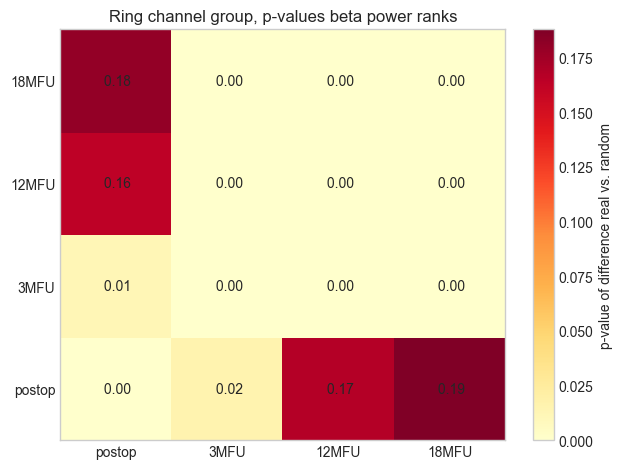

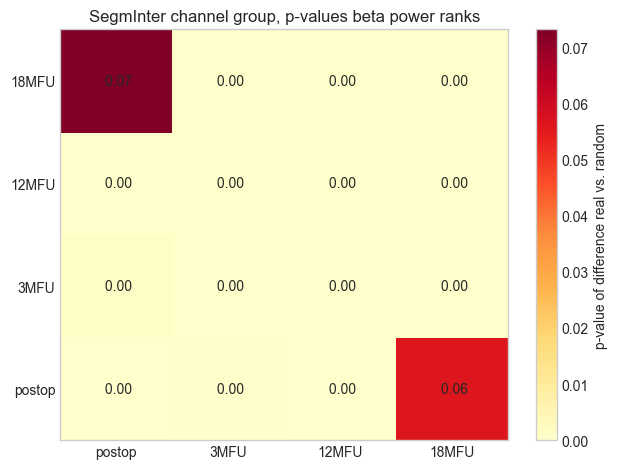

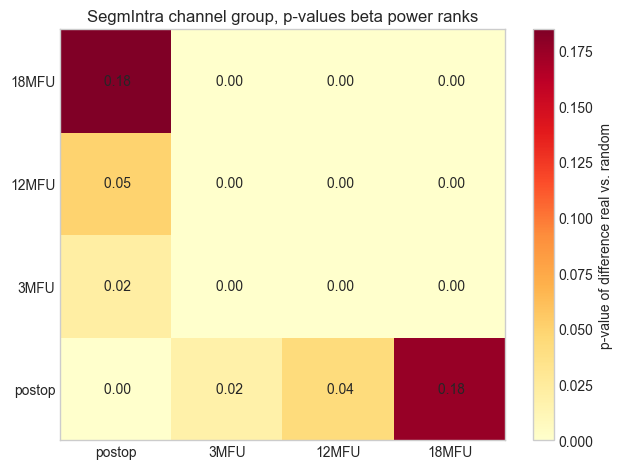

In [36]:
heatmap_permutation_distances = Permute_ranks.heatmap_distances_to_permutated_mean(
    data2permute="psdAverage",
    filterSignal="band-pass",
    normalization="rawPsd",
    freqBand="beta"
)

In [20]:
permutation_results = loadResults.load_BIPpermutation_ranks_result(
    data2permute="psdAverage",
    filterSignal="band-pass",
    normalization="rawPsd",
    freqBand="beta"
)

In [21]:
permutation_results

,comparison,channelGroup,MEAN_differenceOfRanks,distanceMEANreal_MEANrandom,p-value
Postop_Postop_Ring,Postop_Postop,Ring,0.0,-5.560814,0.000000013425985
Postop_Postop_SegmInter,Postop_Postop,SegmInter,0.0,-5.698809,0.000000006032364
Postop_Postop_SegmIntra,Postop_Postop,SegmIntra,0.0,-9.935757,0.000000000000000
Postop_Fu3m_Ring,Postop_Fu3m,Ring,0.533333,-2.151105,0.015733955976777
Postop_Fu3m_SegmInter,Postop_Fu3m,SegmInter,0.4,-3.280348,0.000518396075470
Postop_Fu3m_SegmIntra,Postop_Fu3m,SegmIntra,1.566667,-2.082225,0.018660957367470
Postop_Fu12m_Ring,Postop_Fu12m,Ring,0.733333,-0.962442,0.167913805683052
Postop_Fu12m_SegmInter,Postop_Fu12m,SegmInter,0.266667,-4.103181,0.000020375403819
Postop_Fu12m_SegmIntra,Postop_Fu12m,SegmIntra,1.633333,-1.717616,0.042933320921330
Postop_Fu18m_Ring,Postop_Fu18m,Ring,0.666667,-0.885872,0.187843123108600


## 2. Permutation analysis of beta ranks -> FOOOF spectra

In [30]:
fooof_beta_rank_permutation = Permute_ranks.permutation_fooof_beta_ranks(
    fooof_spectrum="periodic_spectrum"
)

In [31]:
fooof_beta_rank_permutation["permutation_result_df"]

,comparison,channel_group,sample_size_stn,standard_deviation_real_different_ranks,mean_real_different_ranks,distance_real_vs_random_mean_different_ranks,p-value,sample_size_random_shuffles
postop_postop_ring,postop_postop,ring,20,0.0,0.0,-7.887348,0.000000000000002,1000
postop_postop_segm_inter,postop_postop,segm_inter,20,0.0,0.0,-7.777732,0.000000000000004,1000
postop_postop_segm_intra,postop_postop,segm_intra,20,0.0,0.0,-14.854158,0.000000000000000,1000
postop_fu3m_ring,postop_fu3m,ring,18,0.0,0.518519,-3.365446,0.000382100025548,1000
postop_fu3m_segm_inter,postop_fu3m,segm_inter,18,0.0,0.444444,-3.818639,0.000067094981792,1000
postop_fu3m_segm_intra,postop_fu3m,segm_intra,18,0.0,1.796296,-1.035167,0.150295558078755,1000
postop_fu12m_ring,postop_fu12m,ring,12,0.0,0.611111,-1.951167,0.025518608128506,1000
postop_fu12m_segm_inter,postop_fu12m,segm_inter,12,0.0,0.5,-2.633532,0.004225095756631,1000
postop_fu12m_segm_intra,postop_fu12m,segm_intra,12,0.0,1.638889,-1.884051,0.029779037619773,1000
postop_fu18m_ring,postop_fu18m,ring,4,0.0,0.666667,-0.954853,0.169826044135381,1000


In [9]:
# write and load dataframe with beta ranks

beta_rank_DF = writeGroupDF.highest_beta_channels_fooof(
    fooof_spectrum="periodic_spectrum"
)

file:  highest_beta_channels_fooof_periodic_spectrum.pickle 
written in:  c:\Users\jebe12\Research\Longterm_beta_project\results
file:  beta_ranks_all_channels_fooof_periodic_spectrum.pickle 
written in:  c:\Users\jebe12\Research\Longterm_beta_project\results


In [10]:
beta_rank_DF = loadResults.load_fooof_beta_ranks(
    fooof_spectrum="periodic_spectrum",
    all_or_one_chan="beta_ranks_all"
)

## 3. Spearman correlation of monopolar beta power ranks along electrodes

pickle file loaded:  GroupMonopolar_weightedPsdCoordinateDistance_relToRank1_beta_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results


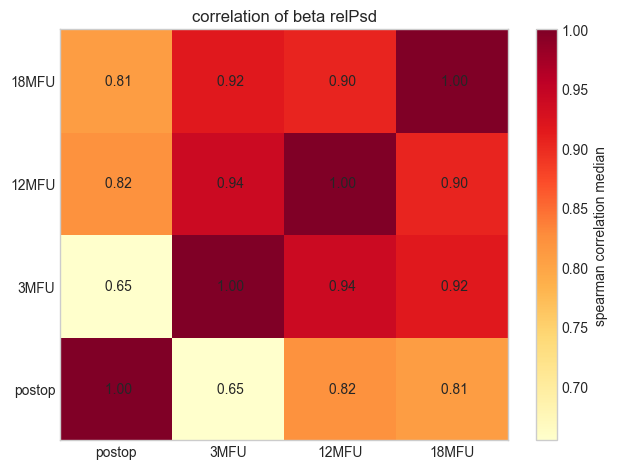

In [30]:
# automatized method to plot heatmap of spearman correlation between sessions
monopol_spearman_correl = groupMonopol.monopol_psd_correlations_sessions(
    freqBand="beta",
    ranks_or_relPsd="relPsd",
    mean_or_median="median"
)


In [31]:
monopol_spearman_correl["spearman_m_df"]

,session_1,session_2,median_spearmanr,median_pval
postop_postop_spearman_m,postop,postop,1.0,0.0
postop_fu3m_spearman_m,postop,fu3m,0.654762,0.046528
postop_fu12m_spearman_m,postop,fu12m,0.821429,0.012539
postop_fu18m_spearman_m,postop,fu18m,0.809524,0.014903
fu3m_postop_spearman_m,fu3m,postop,0.654762,0.046528
fu3m_fu3m_spearman_m,fu3m,fu3m,1.0,0.0
fu3m_fu12m_spearman_m,fu3m,fu12m,0.940476,0.000562
fu3m_fu18m_spearman_m,fu3m,fu18m,0.916667,0.001436
fu12m_postop_spearman_m,fu12m,postop,0.821429,0.012539
fu12m_fu3m_spearman_m,fu12m,fu3m,0.940476,0.000562


In [9]:
# load the monolopar beta psd for for each electrode at different timepoints
data_weightedByCoordinates = loadResults.load_GroupMonoRef_weightedPsdCoordinateDistance_pickle(
    freqBand="beta",
    normalization="rawPsd",
    filterSignal="band-pass"

)

pickle file loaded:  GroupMonopolar_weightedPsdCoordinateDistance_relToRank1_beta_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results


In [10]:
data_weightedByCoordinates.head()

,contact,coord_z,coord_xy,subject_hemisphere,session,averaged_monopolar_PSD_beta,rank,relativePSD_to_beta_Rank1
0,0,0.0+0.0j,0.00+0.00j,017_Right,fu3m,0.206574,10.0,0.783786
1,1,2.0+0.0j,0.00+0.00j,017_Right,fu3m,0.242470,7.0,0.919984
2,2,4.0+0.0j,0.00+0.00j,017_Right,fu3m,0.254409,4.0,0.965286
3,3,6.0+0.0j,0.00+0.00j,017_Right,fu3m,0.263559,1.0,1.000000
4,1A,2.0+0.0j,0.65+0.00j,017_Right,fu3m,0.242557,6.0,0.920316


In [11]:
freqBand="beta"
normalization="rawPsd"
filterSignal="band-pass"

sessions = ["postop", "fu3m", "fu12m", "fu18m"]
contacts = ["0", "1A", "1B", "1C", "2A", "2B", "2C", "3"]

weightedByCoordinate_Dataframe = pd.DataFrame() # concat all Dataframes from all sub, hem, sessions


# first check, which STNs and sessions exist in data 
sub_hem_keys = list(data_weightedByCoordinates.subject_hemisphere.unique())

################## CHOOSE ONLY 8 CONTACTS AND RANK AGAIN ##################
for STN in sub_hem_keys:

    # select only one STN
    STN_data = data_weightedByCoordinates[data_weightedByCoordinates.subject_hemisphere == STN]


    for ses in sessions:

        # first check, if session exists in STN data
        if ses not in STN_data.session.values:
            continue

        
        # get the dataframe per session
        STN_session_data = STN_data[STN_data.session == ses]

        # choose only directional contacts and Ring contacts 0, 3 and rank again only the chosen contacts
        STN_session_data = STN_session_data[STN_session_data["contact"].isin(contacts)]
        STN_session_data["Rank8contacts"] = STN_session_data["averaged_monopolar_PSD_beta"].rank(ascending=False) # ranks 1-8
        STN_session_data_copy = STN_session_data.copy()
        STN_session_data_copy.drop(["rank"], axis=1, inplace=True)

        # calculate the relative PSD to the highest PSD of the 8 remaining contacts
        beta_rank_1 = STN_session_data_copy[STN_session_data_copy["Rank8contacts"] == 1.0] # taking the row containing 1.0 in rank
        beta_rank_1 = beta_rank_1[f"averaged_monopolar_PSD_{freqBand}"].values[0] # just taking psdAverage of rank 1.0

        STN_session_data_copy[f"relativePSD_to_{freqBand}_Rank1from8"] = STN_session_data_copy.apply(lambda row: row[f"averaged_monopolar_PSD_{freqBand}"] / beta_rank_1, axis=1) # in each row add to new value psd/beta_rank1
        STN_session_data_copy.drop([f"relativePSD_to_{freqBand}_Rank1"], axis=1, inplace=True)
        # session_weightedByCoordinates_copy["subject_hemisphere_monoChannel"] = session_weightedByCoordinates_copy[["subject_hemisphere", "monopolarChannels"]].agg("_".join, axis=1)
        

        weightedByCoordinate_Dataframe = pd.concat([weightedByCoordinate_Dataframe, STN_session_data_copy], ignore_index=True)

In [12]:
weightedByCoordinate_Dataframe.head()

,contact,coord_z,coord_xy,subject_hemisphere,session,averaged_monopolar_PSD_beta,Rank8contacts,relativePSD_to_beta_Rank1from8
0,0,0.0+0.0j,0.000000+0.000000j,017_Right,fu3m,0.206574,8.0,0.783786
1,3,6.0+0.0j,0.000000+0.000000j,017_Right,fu3m,0.263559,1.0,1.000000
2,1A,2.0+0.0j,0.650000+0.000000j,017_Right,fu3m,0.242557,5.0,0.920316
3,1B,2.0+0.0j,-0.325000+0.562917j,017_Right,fu3m,0.235433,7.0,0.893283
4,1C,2.0+0.0j,-0.325000-0.562917j,017_Right,fu3m,0.238925,6.0,0.906535


In [13]:
# get all possible pairs of sessions 
sessions = ["postop", "fu3m", "fu12m", "fu18m"]
# pairs = list(combinations(sessions, 2))
pairs = list(itertools.product(sessions, sessions))


# pairs[0][1]

sub_hem_keys = list(weightedByCoordinate_Dataframe.subject_hemisphere.unique()) # n=13 subjects

# divide Dataframe into 4 session dataframes
# postop_df = weightedByCoordinate_Dataframe.loc[(weightedByCoordinate_Dataframe.session == "postop")]
# fu3m_df = weightedByCoordinate_Dataframe.loc[(weightedByCoordinate_Dataframe.session == "fu3m")]
# fu12m_df = weightedByCoordinate_Dataframe.loc[(weightedByCoordinate_Dataframe.session == "fu12m")]
# fu18m_df = weightedByCoordinate_Dataframe.loc[(weightedByCoordinate_Dataframe.session == "fu18m")]

# from the list of all existing sub_hem STNs, get only the STNs with existing sessions 1 + 2 
session_pair_STNs = {}

# find session pairs to correlate: check for each pair if subject exists
for p, pair in enumerate(pairs):

    # define session 1 and session 2 to correlate
    session_1 = pair[0]
    session_2 = pair[1]

    session_1_df = weightedByCoordinate_Dataframe.loc[(weightedByCoordinate_Dataframe.session == session_1)]
    session_2_df = weightedByCoordinate_Dataframe.loc[(weightedByCoordinate_Dataframe.session == session_2)]

    for STN in sub_hem_keys:

        # only run, if sub_hem STN exists in both session Dataframes
        if STN not in session_1_df.subject_hemisphere.values:
            continue

        elif STN not in session_2_df.subject_hemisphere.values:
            continue
        
        # get the rows with the current STN of both sessions: 1 and 2
        STN_session_1 = session_1_df.loc[(session_1_df.subject_hemisphere == STN)]
        STN_session_2 = session_2_df.loc[(session_2_df.subject_hemisphere == STN)]

        # correlate the ranks of session 1 and session 2 of each STN 
        spearman_correlation = stats.spearmanr(STN_session_1.relativePSD_to_beta_Rank1from8.values, STN_session_2.relativePSD_to_beta_Rank1from8.values)


        session_pair_STNs[f"{session_1}_{session_2}_{STN}"] = [session_1, session_2, STN, spearman_correlation.statistic, spearman_correlation.pvalue]

In [14]:
results_DF = pd.DataFrame(session_pair_STNs)
results_DF.rename(index={0: "session_1", 1: "session_2", 2: "subject_hemisphere", 3: "spearman_r", 4: "pval"}, inplace=True)
results_DF = results_DF.transpose()

In [15]:
results_DF.head()

,session_1,session_2,subject_hemisphere,spearman_r,pval
postop_postop_024_Right,postop,postop,024_Right,1.0,0.0
postop_postop_024_Left,postop,postop,024_Left,1.0,0.0
postop_postop_025_Right,postop,postop,025_Right,1.0,0.0
postop_postop_025_Left,postop,postop,025_Left,1.0,0.0
postop_postop_026_Right,postop,postop,026_Right,1.0,0.0


In [16]:
# plot a heat map: x values = session 1 and y values = session 2; color map = r spearman values

spearman_mean = {}

# calculate the MEAN of each session pair
for p, pair in enumerate(pairs):

    # define session 1 and session 2 to correlate
    session_1 = pair[0]
    session_2 = pair[1]

    pairs_df = results_DF.loc[(results_DF.session_1 == session_1)]
    pairs_df = pairs_df.loc[(pairs_df.session_2 == session_2)]

    mean_spearmanr = pairs_df.spearman_r.mean() # take the absolute values
    mean_pval = pairs_df.pval.mean()

    spearman_mean[f"{session_1}_{session_2}_spearman_mean"] = [session_1, session_2, mean_spearmanr, mean_pval]

spearman_df = pd.DataFrame(spearman_mean)
spearman_df.rename(index={0: "session_1", 1: "session_2", 2: "mean_spearmanr", 3: "mean_pval"}, inplace=True)
spearman_df = spearman_df.transpose()

mean_spearmanr = spearman_df.mean_spearmanr.values.astype(float)

In [17]:
spearman_df

,session_1,session_2,mean_spearmanr,mean_pval
postop_postop_spearman_mean,postop,postop,1.0,0.0
postop_fu3m_spearman_mean,postop,fu3m,0.575893,0.252464
postop_fu12m_spearman_mean,postop,fu12m,0.640873,0.125557
postop_fu18m_spearman_mean,postop,fu18m,0.797619,0.020716
fu3m_postop_spearman_mean,fu3m,postop,0.575893,0.252464
fu3m_fu3m_spearman_mean,fu3m,fu3m,1.0,0.0
fu3m_fu12m_spearman_mean,fu3m,fu12m,0.771164,0.093812
fu3m_fu18m_spearman_mean,fu3m,fu18m,0.797619,0.095895
fu12m_postop_spearman_mean,fu12m,postop,0.640873,0.125557
fu12m_fu3m_spearman_mean,fu12m,fu3m,0.771164,0.093812


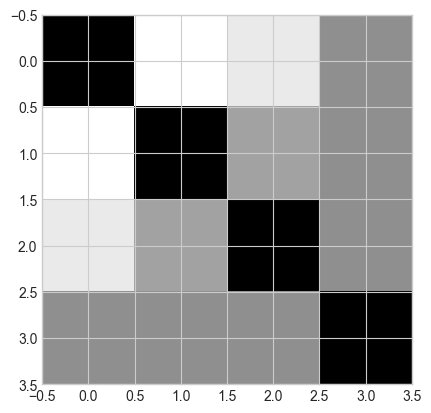

In [18]:
mean_spearmanr = spearman_df.mean_spearmanr.values.astype(float)

plt.imshow(mean_spearmanr.reshape(4,4))

In [19]:
mean_spearmanr.reshape(4,4)

array([[1.        , 0.57589286, 0.64087302, 0.79761905],
       [0.57589286, 1.        , 0.77116402, 0.79761905],
       [0.64087302, 0.77116402, 1.        , 0.79761905],
       [0.79761905, 0.79761905, 0.79761905, 1.        ]])

In [20]:
spearman_heatmap = spearman_df.loc[:, ["session_1", "session_2", "mean_spearmanr"]]
spearman_heatmap

,session_1,session_2,mean_spearmanr
postop_postop_spearman_mean,postop,postop,1.0
postop_fu3m_spearman_mean,postop,fu3m,0.575893
postop_fu12m_spearman_mean,postop,fu12m,0.640873
postop_fu18m_spearman_mean,postop,fu18m,0.797619
fu3m_postop_spearman_mean,fu3m,postop,0.575893
fu3m_fu3m_spearman_mean,fu3m,fu3m,1.0
fu3m_fu12m_spearman_mean,fu3m,fu12m,0.771164
fu3m_fu18m_spearman_mean,fu3m,fu18m,0.797619
fu12m_postop_spearman_mean,fu12m,postop,0.640873
fu12m_fu3m_spearman_mean,fu12m,fu3m,0.771164


In [23]:
column_mean = spearman_heatmap.pop("mean_spearmanr")
spearman_heatmap.insert(0, "mean_spearmanr", column_mean)

In [24]:
spearman_heatmap

,mean_spearmanr,session_1,session_2
postop_postop_spearman_mean,1.0,postop,postop
postop_fu3m_spearman_mean,0.575893,postop,fu3m
postop_fu12m_spearman_mean,0.640873,postop,fu12m
postop_fu18m_spearman_mean,0.797619,postop,fu18m
fu3m_postop_spearman_mean,0.575893,fu3m,postop
fu3m_fu3m_spearman_mean,1.0,fu3m,fu3m
fu3m_fu12m_spearman_mean,0.771164,fu3m,fu12m
fu3m_fu18m_spearman_mean,0.797619,fu3m,fu18m
fu12m_postop_spearman_mean,0.640873,fu12m,postop
fu12m_fu3m_spearman_mean,0.771164,fu12m,fu3m


In [25]:
import plotly.express as px

# data=[[0.575893, 0.640873, 0.797619], [None, 0.771164, 0.797619], [None, None, 0.797619]] # no absolute 
# data = [[0.590774, 0.740079, 0.797619], [1, 0.810847, 0.797619], [0.810847, 1, 0.85]] # Mean of absolute values, 1 manually added for correlation fu3m-fu3m and fu12m-fu12m
data = mean_spearmanr.reshape(4,4)

fig = px.imshow(data,
                labels=dict(x="session 1", y="session 2", color="Mean of spearman correlation"),
                x=['postop', 'fu3m', 'fu12m', 'fu18m'],
                y=['postop', 'fu3m', 'fu12m', 'fu18m'],
               )
fig.update_xaxes(side="top")
fig.show()

In [ ]:
figures_path = find_folders.get_local_path(folder="GroupFigures")

filename = os.path.join(figures_path, "Monopol_session_correlations_heatmap_beta_relPsd_mean")

fig.write_image(filename, format="png")

## 4. Quantify the change of levels and directions of monopolar beta ranks

Method to quantify and plot differenes of levels of ranks from 1-8 across electrodes

In [38]:
level_difference_df = groupMonopol.mono_rank_differences(
    freq_band="beta",
    normalization="rawPsd",
    filter_signal="band-pass",
    level_or_direction="direction"
)

pickle file loaded:  GroupMonopolar_weightedPsdCoordinateDistance_relToRank1_beta_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results


In [41]:
level_difference_df.head()

,session_comparison,session_1,session_2,subject_hemisphere,rank,direction_session_1,direction_session_2,direction_difference
0_0_024_Right_1,0_0,0,0,024_Right,1,A,A,0
0_0_024_Right_2,0_0,0,0,024_Right,2,B,B,0
0_0_024_Right_3,0_0,0,0,024_Right,3,C,C,0
0_0_024_Right_4,0_0,0,0,024_Right,4,A,A,0
0_0_024_Right_5,0_0,0,0,024_Right,5,B,B,0


In [60]:
# filter only ranks 1,2,3
ranks_included = [1,2,3]
ranks_1_2_3 = level_difference_df[level_difference_df["rank"].isin(ranks_included)]
ranks_1_2_3.head()

,session_comparison,session_1,session_2,subject_hemisphere,rank,level_session_1,level_session_2,level_abs_difference
0_0_024_Right_1,0_0,0,0,024_Right,1,0,0,0
0_0_024_Right_2,0_0,0,0,024_Right,2,1,1,0
0_0_024_Right_3,0_0,0,0,024_Right,3,1,1,0
0_0_024_Left_1,0_0,0,0,024_Left,1,1,1,0
0_0_024_Left_2,0_0,0,0,024_Left,2,1,1,0


In [29]:
session = [0, 3, 12, 18]
pairs = list(itertools.product(session, session))
pairs

16

Calculate the percentage of 0, 1, 2 and 3 differences per session comparison

pickle file loaded:  group_monoRef_only_segmental_weight_psd_by_distance_beta_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results
ranks_included: ranks allowed = [1, 2, 3, 4, 5, 6].


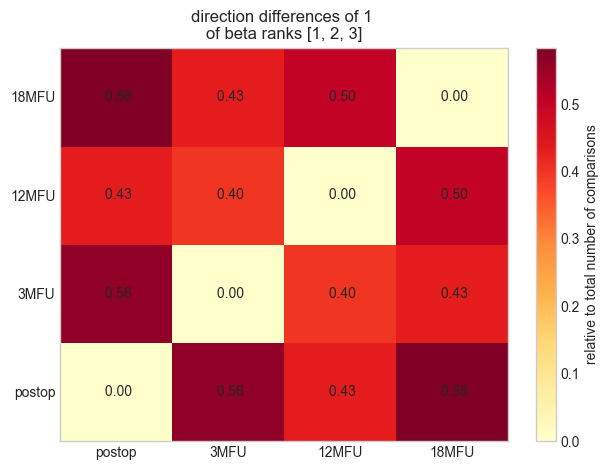

In [43]:
mono_rank_level_difference_heatmap = groupMonopol.mono_rank_difference_heatmap(
    freq_band="beta",
    normalization="rawPsd",
    filter_signal="band-pass",
    ranks_included=[1,2,3],
    difference_to_plot="1",
    level_or_direction="direction",
    only_segmental="no"
)



In [51]:
mono_rank_level_difference_heatmap["description_results"]

,session_comparison,number_of_observations,number_of_stn,mean,standard_deviation
0_0,0_0,24,24,0.0,0.0
0_3,0_3,22,22,0.181818,0.385695
0_12,0_12,12,12,0.0,0.0
0_18,0_18,4,4,0.25,0.433013
3_0,3_0,22,22,0.181818,0.385695
3_3,3_3,32,32,0.0,0.0
3_12,3_12,20,20,0.15,0.357071
3_18,3_18,10,10,0.1,0.3
12_0,12_0,12,12,0.0,0.0
12_3,12_3,20,20,0.15,0.357071


In [32]:
mono_rank_level_difference_heatmap["description_results"]

,session_comparison,number_of_observations,number_of_stn,mean,standard_deviation
0_0,0_0,72,24,0,0.0
0_3,0_3,66,22,0,0.608518
0_12,0_12,36,12,0,0.595119
0_18,0_18,12,4,0,0.372678
3_0,3_0,66,22,0,0.608518
3_3,3_3,96,32,0,0.0
3_12,3_12,60,20,0,0.478423
3_18,3_18,30,10,0,0.442217
12_0,12_0,36,12,0,0.595119
12_3,12_3,60,20,0,0.478423


In [21]:
comparisons = ["0_0", "0_3", "0_12", "0_18", 
                    "3_0", "3_3", "3_12", "3_18", 
                    "12_0", "12_3", "12_12", "12_18",
                    "18_0", "18_3", "18_12", "18_18"]

session_comparison_level_difference_dict = {}

for comp in comparisons:

    comp_dataframe = level_difference_df.loc[level_difference_df.session_comparison == comp]
    session_1 = comp_dataframe.session_1.values[0]
    session_2 = comp_dataframe.session_2.values[0]

    # quantify percentage of how often differences occur
    total_rank_comparisons = comp_dataframe["level_abs_difference"].count()

    # check if numbers exist for each difference value
    if 0 not in comp_dataframe["level_abs_difference"].values:
        count_0 = 0
    else: 
        count_0 = comp_dataframe["level_abs_difference"].value_counts()[0]

    
    if 1 not in comp_dataframe["level_abs_difference"].values:
        count_1 = 0
    else: 
        count_1 = comp_dataframe["level_abs_difference"].value_counts()[1]


    if 2 not in comp_dataframe["level_abs_difference"].values:
        count_2 = 0
    else: 
        count_2 = comp_dataframe["level_abs_difference"].value_counts()[2]

    
    if 3 not in comp_dataframe["level_abs_difference"].values:
        count_3 = 0
    else: 
        count_3 = comp_dataframe["level_abs_difference"].value_counts()[3]

    count_1_or_less = count_0 + count_1
    count_more_than_1 = count_2 + count_3

    # relative values to total rank comparisons
    rel_0 = count_0 / total_rank_comparisons
    rel_1 = count_1 / total_rank_comparisons
    rel_2 = count_2 / total_rank_comparisons
    rel_3 = count_3 / total_rank_comparisons

    rel_1_or_less = count_1_or_less / total_rank_comparisons
    rel_more_than_1 = count_more_than_1 / total_rank_comparisons

    # save in a dict
    session_comparison_level_difference_dict[f"{comp}"] = [comp, session_1, session_2, total_rank_comparisons, 
                                                           rel_0, rel_1, rel_2, rel_3, rel_1_or_less, rel_more_than_1]
    

# transform to dataframe
session_comparison_level_difference_df = pd.DataFrame(session_comparison_level_difference_dict)
session_comparison_level_difference_df.rename(index={
    0: "session_comparison",
    1: "session_1",
    2: "session_2", 
    3: "total_rank_comparisons",
    4: "rel_amount_difference_0",
    5: "rel_amount_difference_1",
    6: "rel_amount_difference_2",
    7: "rel_amount_difference_3",
    8: "rel_amount_difference_1_or_less",
    9: "rel_amount_difference_more_than_1",
}, inplace=True)
session_comparison_level_difference_df = session_comparison_level_difference_df.transpose()


In [35]:
session_comparison_level_difference_df

,session_comparison,session_1,session_2,total_rank_comparisons,rel_amount_difference_0,rel_amount_difference_1,rel_amount_difference_2,rel_amount_difference_3,rel_amount_difference_1_or_less,rel_amount_difference_more_than_1
0_0,0_0,0,0,192,1.0,0.0,0.0,0.0,1.0,0.0
0_3,0_3,0,3,176,0.494318,0.352273,0.096591,0.056818,0.846591,0.153409
0_12,0_12,0,12,96,0.614583,0.229167,0.135417,0.020833,0.84375,0.15625
0_18,0_18,0,18,32,0.71875,0.125,0.15625,0.0,0.84375,0.15625
3_0,3_0,3,0,176,0.494318,0.352273,0.096591,0.056818,0.846591,0.153409
3_3,3_3,3,3,256,1.0,0.0,0.0,0.0,1.0,0.0
3_12,3_12,3,12,160,0.75,0.18125,0.05,0.01875,0.93125,0.06875
3_18,3_18,3,18,80,0.725,0.175,0.075,0.025,0.9,0.1
12_0,12_0,12,0,96,0.614583,0.229167,0.135417,0.020833,0.84375,0.15625
12_3,12_3,12,3,160,0.75,0.18125,0.05,0.01875,0.93125,0.06875


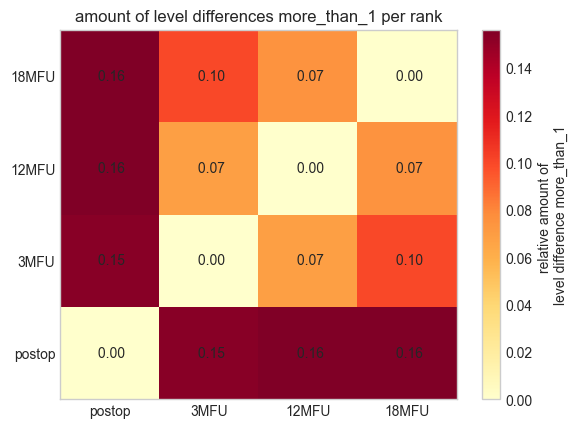

In [66]:
# plot heatmap
difference = "more_than_1"

# transform difference values to floats and 4x4 matrices
if difference == "1_or_less":
    difference_to_plot = session_comparison_level_difference_df.rel_amount_difference_1_or_less.values.astype(float)
    # reshape the mean of spearman r values into 4x4 matrix
    difference_to_plot = difference_to_plot.reshape(4,4)

elif difference == "more_than_1":
    difference_to_plot = session_comparison_level_difference_df.rel_amount_difference_more_than_1.values.astype(float)
    # reshape the medians of spearman r values into 4x4 matrix
    difference_to_plot = difference_to_plot.reshape(4,4)


fig, ax = plt.subplots()

heatmap = ax.pcolor(difference_to_plot, cmap=plt.cm.YlOrRd)
# other color options: GnBu, YlOrRd, YlGn, Greys, Blues, PuBuGn, YlGnBu

# Set the x and y ticks to show the indices of the matrix
ax.set_xticks(np.arange(difference_to_plot.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(difference_to_plot.shape[0])+0.5, minor=False)

# Set the tick labels to show the values of the matrix
ax.set_xticklabels(["postop", "3MFU", "12MFU", "18MFU"], minor=False)
ax.set_yticklabels(["postop", "3MFU", "12MFU", "18MFU"], minor=False)

# Rotate the x-axis tick labels to be vertical
# plt.xticks(rotation=90)

# Add a colorbar to the right of the heatmap
cbar = plt.colorbar(heatmap)
cbar.set_label(f"relative amount of \nlevel difference {difference}")

# Add the cell values to the heatmap
for i in range(difference_to_plot.shape[0]):
    for j in range(difference_to_plot.shape[1]):
        plt.text(j + 0.5, i + 0.5, str("{: .2f}".format(difference_to_plot[i, j])), ha='center', va='center') # only show 2 numbers after the comma of a float

# Add a title
plt.title(f"amount of level differences {difference} per rank")

# Show the plot
plt.show()



Write new function using existing dataframes

In [9]:
# load the monolopar beta psd for for each electrode at different timepoints
data_weightedByCoordinates = loadResults.load_GroupMonoRef_weightedPsdCoordinateDistance_pickle(
    freqBand="beta",
    normalization="rawPsd",
    filterSignal="band-pass"
)

pickle file loaded:  GroupMonopolar_weightedPsdCoordinateDistance_relToRank1_beta_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results


In [10]:
data_weightedByCoordinates.head()

,contact,coord_z,coord_xy,subject_hemisphere,session,averaged_monopolar_PSD_beta,rank,relativePSD_to_beta_Rank1
0,0,0.0+0.0j,0.00+0.00j,017_Right,fu3m,0.206574,10.0,0.783786
1,1,2.0+0.0j,0.00+0.00j,017_Right,fu3m,0.242470,7.0,0.919984
2,2,4.0+0.0j,0.00+0.00j,017_Right,fu3m,0.254409,4.0,0.965286
3,3,6.0+0.0j,0.00+0.00j,017_Right,fu3m,0.263559,1.0,1.000000
4,1A,2.0+0.0j,0.65+0.00j,017_Right,fu3m,0.242557,6.0,0.920316


In [11]:
freqBand="beta"
normalization="rawPsd"
filterSignal="band-pass"

sessions = ["postop", "fu3m", "fu12m", "fu18m"]
contacts = ["0", "1A", "1B", "1C", "2A", "2B", "2C", "3"]

weightedByCoordinate_Dataframe = pd.DataFrame() # concat all Dataframes from all sub, hem, sessions


# first check, which STNs and sessions exist in data 
sub_hem_keys = list(data_weightedByCoordinates.subject_hemisphere.unique())

################## CHOOSE ONLY 8 CONTACTS AND RANK AGAIN ##################
for STN in sub_hem_keys:

    # select only one STN
    STN_data = data_weightedByCoordinates[data_weightedByCoordinates.subject_hemisphere == STN]


    for ses in sessions:

        # first check, if session exists in STN data
        if ses not in STN_data.session.values:
            continue

        
        # get the dataframe per session
        STN_session_data = STN_data[STN_data.session == ses]

        # choose only directional contacts and Ring contacts 0, 3 and rank again only the chosen contacts
        STN_session_data = STN_session_data[STN_session_data["contact"].isin(contacts)]
        STN_session_data["Rank8contacts"] = STN_session_data["averaged_monopolar_PSD_beta"].rank(ascending=False) # ranks 1-8
        STN_session_data_copy = STN_session_data.copy()
        STN_session_data_copy.drop(["rank"], axis=1, inplace=True)

        # calculate the relative PSD to the highest PSD of the 8 remaining contacts
        beta_rank_1 = STN_session_data_copy[STN_session_data_copy["Rank8contacts"] == 1.0] # taking the row containing 1.0 in rank
        beta_rank_1 = beta_rank_1[f"averaged_monopolar_PSD_{freqBand}"].values[0] # just taking psdAverage of rank 1.0

        STN_session_data_copy[f"relativePSD_to_{freqBand}_Rank1from8"] = STN_session_data_copy.apply(lambda row: row[f"averaged_monopolar_PSD_{freqBand}"] / beta_rank_1, axis=1) # in each row add to new value psd/beta_rank1
        STN_session_data_copy.drop([f"relativePSD_to_{freqBand}_Rank1"], axis=1, inplace=True)
        # session_weightedByCoordinates_copy["subject_hemisphere_monoChannel"] = session_weightedByCoordinates_copy[["subject_hemisphere", "monopolarChannels"]].agg("_".join, axis=1)
        

        weightedByCoordinate_Dataframe = pd.concat([weightedByCoordinate_Dataframe, STN_session_data_copy], ignore_index=True)

In [12]:
weightedByCoordinate_Dataframe.head()

,contact,coord_z,coord_xy,subject_hemisphere,session,averaged_monopolar_PSD_beta,Rank8contacts,relativePSD_to_beta_Rank1from8
0,0,0.0+0.0j,0.000000+0.000000j,017_Right,fu3m,0.206574,8.0,0.783786
1,3,6.0+0.0j,0.000000+0.000000j,017_Right,fu3m,0.263559,1.0,1.000000
2,1A,2.0+0.0j,0.650000+0.000000j,017_Right,fu3m,0.242557,5.0,0.920316
3,1B,2.0+0.0j,-0.325000+0.562917j,017_Right,fu3m,0.235433,7.0,0.893283
4,1C,2.0+0.0j,-0.325000-0.562917j,017_Right,fu3m,0.238925,6.0,0.906535


In [16]:
ranks_1_to_8 = [1, 2, 3, 4, 5, 6, 7, 8]

comparisons = ["0_0", "0_3", "0_12", "0_18", 
                "3_0", "3_3", "3_12", "3_18", 
                "12_0", "12_3", "12_12", "12_18",
                "18_0", "18_3", "18_12", "18_18"]

# list of STNs
stn_list = list(weightedByCoordinate_Dataframe.subject_hemisphere.unique())

# replace all session names by integers
weightedByCoordinate_Dataframe = weightedByCoordinate_Dataframe.replace(to_replace=["postop", "fu3m", "fu12m", "fu18m"], value=[0, 3, 12, 18])

# Type of ranks should be integers 
weightedByCoordinate_Dataframe["Rank8contacts"] = weightedByCoordinate_Dataframe["Rank8contacts"].astype(int)

# new column with level of contact
weightedByCoordinate_Dataframe_copy = weightedByCoordinate_Dataframe.copy()
weightedByCoordinate_Dataframe_copy = weightedByCoordinate_Dataframe_copy.assign(contact_level=weightedByCoordinate_Dataframe_copy["contact"]).rename(columns={"contact_level": "contact_level"})
weightedByCoordinate_Dataframe_copy["contact_level"] = weightedByCoordinate_Dataframe_copy["contact_level"].replace(to_replace=["0", "3"], value=[0, 3]) # level 0 or 3
weightedByCoordinate_Dataframe_copy["contact_level"] = weightedByCoordinate_Dataframe_copy["contact_level"].replace(to_replace=["1A", "1B", "1C"], value=[1, 1, 1]) # level 1
weightedByCoordinate_Dataframe_copy["contact_level"] = weightedByCoordinate_Dataframe_copy["contact_level"].replace(to_replace=["2A", "2B", "2C"], value=[2, 2, 2]) # level 2

level_difference_dict = {}

for comp in comparisons:

    comp_split = comp.split("_")
    session_1 = int(comp_split[0]) # first session as integer
    session_2 = int(comp_split[1])

    for stn in stn_list:

        # check for each STN, which ones have both sessions
        stn_dataframe = weightedByCoordinate_Dataframe_copy.loc[weightedByCoordinate_Dataframe_copy.subject_hemisphere == stn]

        if session_1 not in stn_dataframe.session.values:
            continue

        elif session_2 not in stn_dataframe.session.values:
            continue

        stn_session_1 = stn_dataframe.loc[stn_dataframe.session == session_1]
        stn_session_2 = stn_dataframe.loc[stn_dataframe.session == session_2]

        # go through each rank and calculate the difference of level between two sessions
        for rank in ranks_1_to_8:

            rank_session_1 = stn_session_1.loc[stn_session_1.Rank8contacts == rank] # row of one rank of session 1
            rank_contact_level_session_1 = rank_session_1.contact_level.values[0] # level of rank as integer

            rank_session_2 = stn_session_2.loc[stn_session_2.Rank8contacts == rank] # row of one rank of session 2
            rank_contact_level_session_2 = rank_session_2.contact_level.values[0] # level of rank as integer

            level_difference_rank = abs(rank_contact_level_session_1 - rank_contact_level_session_2) # difference of level as absolute number

            # store in dictionary
            level_difference_dict[f"{comp}_{stn}_{rank}"] = [comp, session_1, session_2, stn, rank, rank_contact_level_session_1, rank_contact_level_session_2, level_difference_rank]


# transform dictionary to dataframe
level_difference_df = pd.DataFrame(level_difference_dict)
level_difference_df.rename(index={0: "session_comparison",
                                  1: "session_1",
                                  2: "session_2",
                                  3: "subject_hemisphere",
                                  4: "rank",
                                  5: "level_session_1",
                                  6: "level_session_2",
                                  7: "level_abs_difference"}, 
                                  inplace=True)

level_difference_df = level_difference_df.transpose()




In [17]:
level_difference_df.head()

,session_comparison,session_1,session_2,subject_hemisphere,rank,level_session_1,level_session_2,level_abs_difference
0_0_024_Right_1,0_0,0,0,024_Right,1,0,0,0
0_0_024_Right_2,0_0,0,0,024_Right,2,1,1,0
0_0_024_Right_3,0_0,0,0,024_Right,3,1,1,0
0_0_024_Right_4,0_0,0,0,024_Right,4,1,1,0
0_0_024_Right_5,0_0,0,0,024_Right,5,2,2,0


In [15]:
weightedByCoordinate_Dataframe_copy.head()

,contact,coord_z,coord_xy,subject_hemisphere,session,averaged_monopolar_PSD_beta,Rank8contacts,relativePSD_to_beta_Rank1from8,contact_level
0,0,0.0+0.0j,0.000000+0.000000j,017_Right,3,0.206574,8.0,0.783786,0
1,3,6.0+0.0j,0.000000+0.000000j,017_Right,3,0.263559,1.0,1.000000,3
2,1A,2.0+0.0j,0.650000+0.000000j,017_Right,3,0.242557,5.0,0.920316,1
3,1B,2.0+0.0j,-0.325000+0.562917j,017_Right,3,0.235433,7.0,0.893283,1
4,1C,2.0+0.0j,-0.325000-0.562917j,017_Right,3,0.238925,6.0,0.906535,1


## 5. Quantify difference of direction of ranks only for segmental contacts (mono method only for segm recordings used)

In [28]:
mono_rank_only_segm = groupMonopol.mono_rank_differences_only_segmental_rec_used(
    filter_signal = "band-pass",
    normalization = "rawPsd",
    freq_band = "beta"
)

pickle file loaded:  group_monoRef_only_segmental_weight_psd_by_distance_beta_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results


In [29]:
mono_rank_only_segm.head()

,session_comparison,session_1,session_2,subject_hemisphere,rank,direction_session_1,direction_session_2,direction_difference
0_0_024_Right_1,0_0,0,0,024_Right,1,A,A,0
0_0_024_Right_2,0_0,0,0,024_Right,2,B,B,0
0_0_024_Right_3,0_0,0,0,024_Right,3,C,C,0
0_0_024_Right_4,0_0,0,0,024_Right,4,A,A,0
0_0_024_Right_5,0_0,0,0,024_Right,5,B,B,0


pickle file loaded:  group_monoRef_only_segmental_weight_psd_by_distance_beta_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results
ranks_included: ranks allowed = [1, 2, 3, 4, 5, 6].


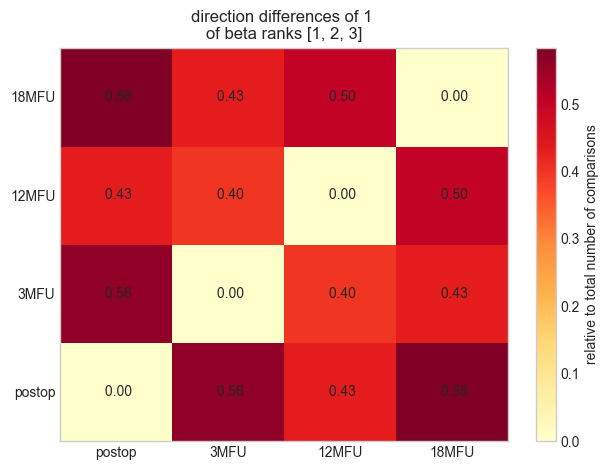

In [39]:
mono_rank_only_segm_heatmap = groupMonopol.mono_rank_difference_heatmap(
    filter_signal = "band-pass",
    normalization = "rawPsd",
    freq_band = "beta",
    ranks_included = [1, 2, 3],
    difference_to_plot = "1",
    level_or_direction = "direction",
    only_segmental = "yes"
)